# Import and set up basic lattice

In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

In [3]:
tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = True,
    numMacroParticles=1e4,
)

setLattice(tao, **importedDefaultSettings)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0


# L2 phase scan

There are a few ways to do a phase scan. Depending on your application, sometimes you'll want the energy to automatically compensate (e.g. if you're doing a study which assumes energy feedbacks are enabled. This is the "usual" mode of operation for simulations). Other times, you'll want the energy not to automatically compensate (e.g. if you're doing a jitter scan; here we assume the feedbacks can't correct on a shot-by-shot basis)

## With energy compensation

L2 phase = -37. Mean energy = 9.853098440954943 GeV


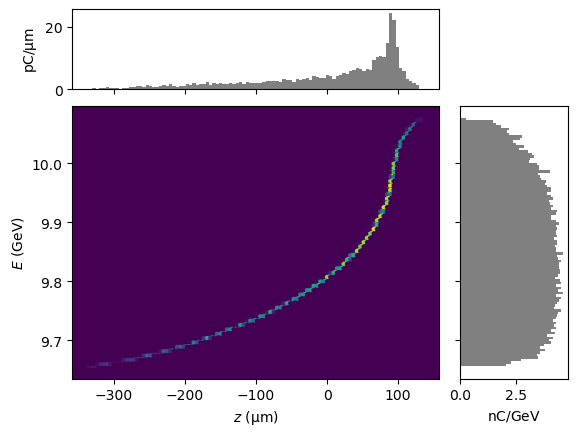

L2 phase = -36. Mean energy = 9.850413620844908 GeV


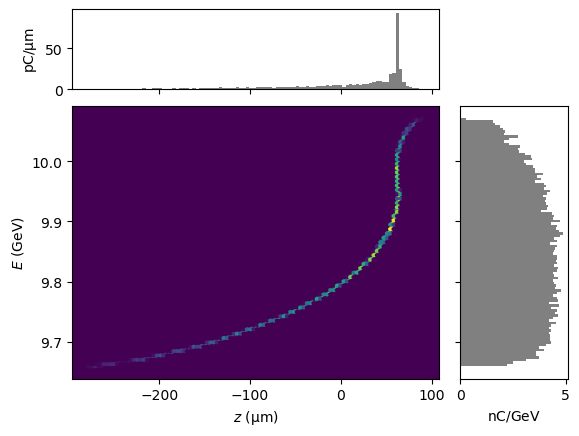

L2 phase = -35. Mean energy = 9.845504855340044 GeV


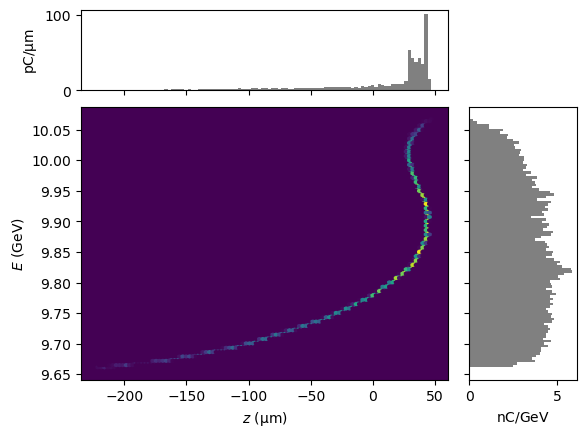

L2 phase = -34. Mean energy = 9.83889481936651 GeV


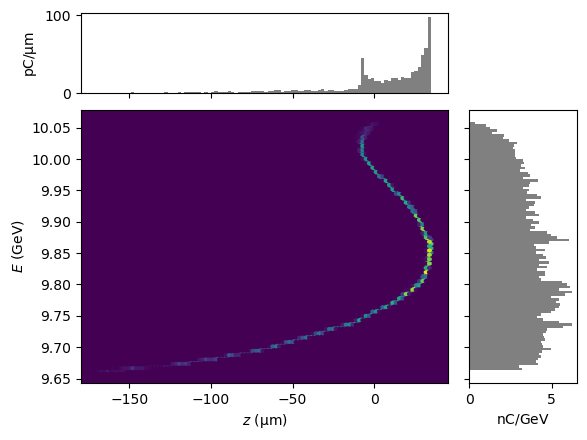

L2 phase = -33. Mean energy = 9.830001710725698 GeV


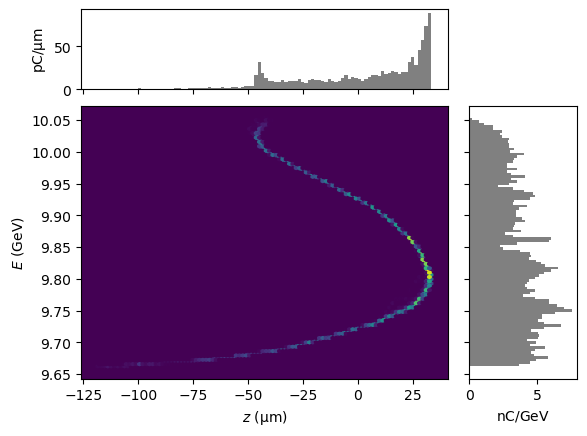

L2 phase = -32. Mean energy = 9.813835764290186 GeV


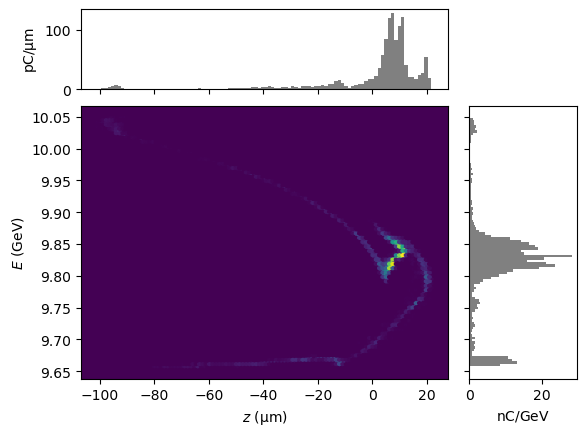

<Figure size 640x480 with 0 Axes>

In [4]:
for L2PhaseSet in np.arange(-37, -31, 1):
    #setLattice() uses **kwargs to set lots of typical settings. Here we use the importedDefaultSettings and then override the L2 phase importedDefaultSettings
    setLattice(tao, **(importedDefaultSettings | { "L2PhaseSet" :L2PhaseSet } ) )

    #We also pass importedDefaultSettings to trackBeam, which cares about other commands that are tracking specific
    #L2 is part of the lattice so we don't need to modify the **kwargs here
    trackBeam(tao, **importedDefaultSettings)

    P = getBeamAtElement(tao, "PENT")

    print(f"""L2 phase = {L2PhaseSet}. Mean energy = {P["mean_energy"]/1e9} GeV""")
    display(plotMod(P, 'z', 'energy',  bins=100))

plt.clf()

You may note here that the energy isn't staying exactly constant. This is because of wakefield effects in the linac which will vary depending on compression. If the energy must stay absolutely constant, use the assertBC20Energy flag for trackBeam()

## Without energy compensation

Here, we can use a lower level function, setLinacPhase(), which sets phases but will not compensate for the energy

L2 phase = -37. Mean energy = 9.666553313603265 GeV


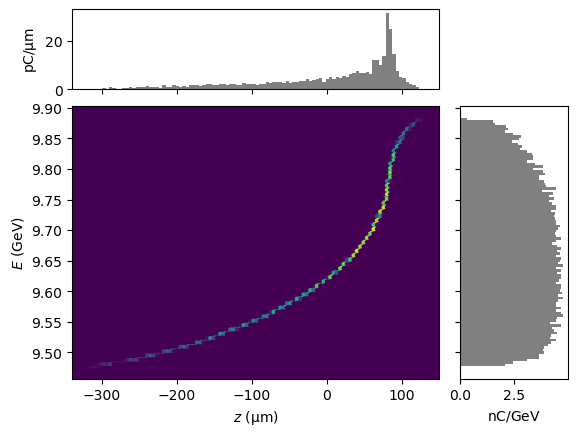

L2 phase = -36. Mean energy = 9.715059540121835 GeV


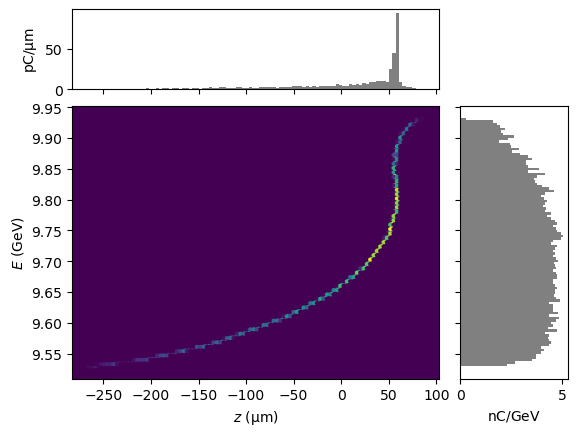

L2 phase = -35. Mean energy = 9.760500204758713 GeV


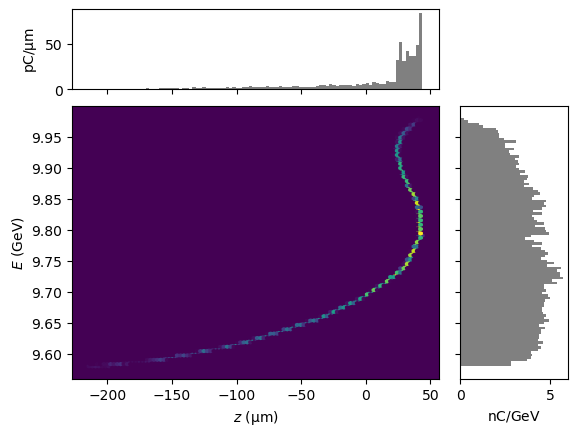

L2 phase = -34. Mean energy = 9.80306044080878 GeV


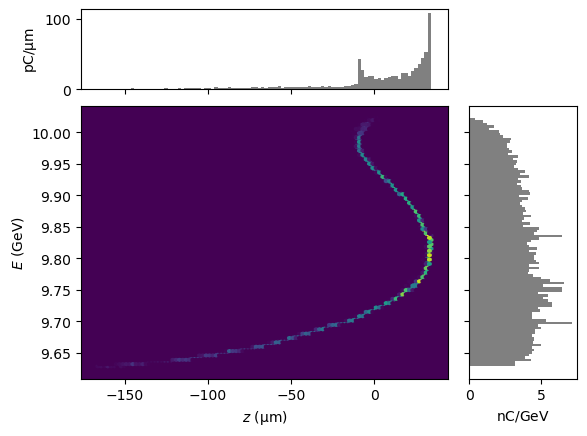

L2 phase = -33. Mean energy = 9.84287387178584 GeV


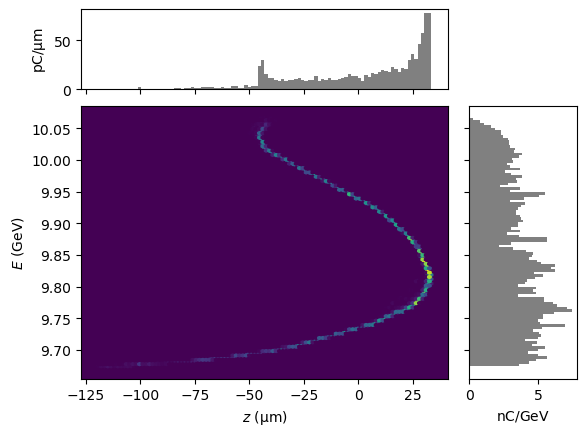

L2 phase = -32. Mean energy = 9.871737162364948 GeV


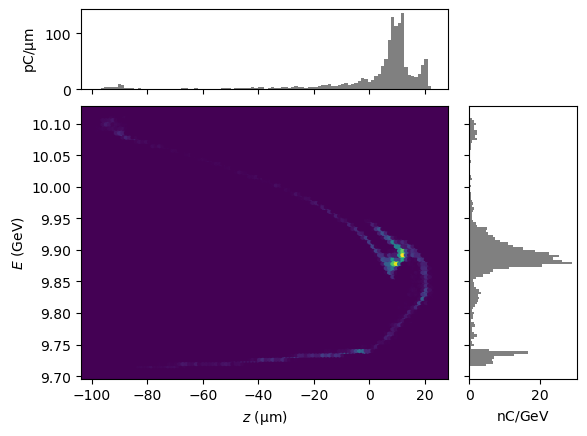

In [5]:
setLattice(tao, **importedDefaultSettings) 

for L2PhaseSet in np.arange(-37, -31, 1):
    setLinacPhase(tao, "L2", L2PhaseSet)
    
    trackBeam(tao, **importedDefaultSettings)

    P = getBeamAtElement(tao, "PENT")

    print(f"""L2 phase = {L2PhaseSet}. Mean energy = {P["mean_energy"]/1e9} GeV""")
    display(plotMod(P, 'z', 'energy',  bins=100))